In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf
tf.enable_eager_execution()

In [3]:
from syn_dataset import SynDataset
from data_utils import DataFactory

/home/malzantot/Nesl/bio_gan/ecg_dataset.py:11: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/malzantot/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/malzantot/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/malzantot/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/malzantot/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/malzantot/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_lo

In [4]:
dataset_name = 'ecg'
syn_data_dir = 'samples/ecg_crnn/07_16_11_32'

In [5]:
train_data, test_data,metadata = DataFactory.create_dataset(dataset_name)
syn_set = SynDataset(syn_data_dir, True)


train_set  = train_data.shuffle(1000).batch(100)
syn_set  = syn_set.to_dataset().shuffle(1000).batch(100)


['1 NSR', '4 AFIB']
['1 NSR', '4 AFIB']
(array([0, 1], dtype=int32), array([211, 102]))
['1 NSR', '4 AFIB']
['1 NSR', '4 AFIB']
(array([0, 1], dtype=int32), array([72, 33]))


In [119]:
def plot_samples(train_set, syn_set, metadata, num_samples=3):
    num_classes = metadata.num_labels
    row_width=4
    num_rows = num_classes 
    num_cols = num_samples * 2
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols*row_width, (num_rows*row_width)))
    #axes = axes.ravel()
    batch_x_real, batch_y_real = next(iter(train_set))
    batch_x_fake, batch_y_fake = next(iter(syn_set))
    print(axes.shape)
    for i in range(num_classes):
        cur_real_col = 0
        for x, y in zip(batch_x_real, batch_y_real):
            #print(i,)
            if y.numpy() == i:
                #print(y)
                axes[i][cur_real_col].plot(x.numpy())
                axes[i][cur_real_col].set_title('real', fontsize=24)
                if cur_real_col == 0:
                    axes[i][cur_real_col].set_ylabel(metadata.classes[i], fontsize=32)
                cur_real_col += 1
                if (cur_real_col == num_samples):
                    break
        cur_syn_col = 0
        for x, y in zip(batch_x_fake, batch_y_fake):
            if y.numpy() == i:
                axes[i][num_samples + cur_syn_col].plot(x.numpy(),color='red')
                axes[i][num_samples + cur_syn_col].set_title('Fake', fontsize=24)
                cur_syn_col += 1
            if cur_syn_col == num_samples:
                break
    #line = plt.Line2D((.25,.25),(.1,.9), color="k", linewidth=3)
    #fig.
    plt.tight_layout()
    return fig

(2, 6)


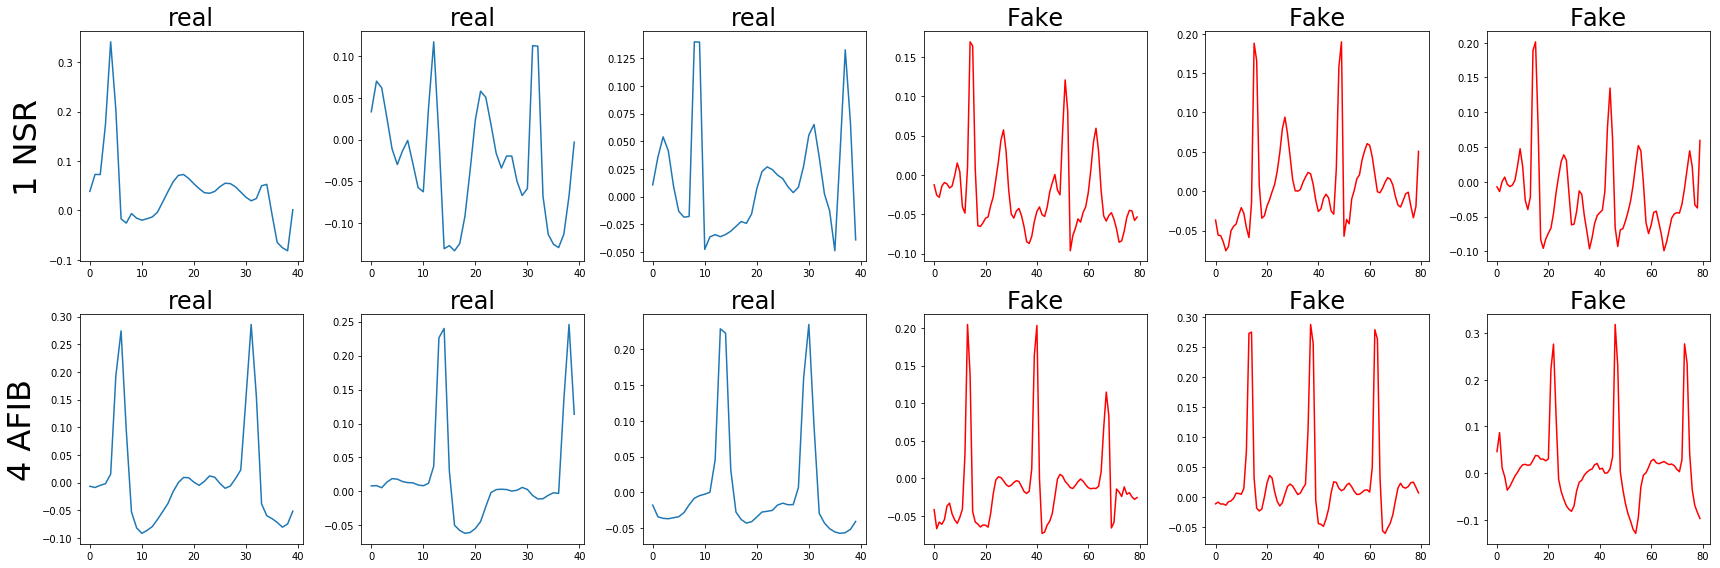

In [120]:
fig = plot_samples(train_set, syn_set, metadata)
fig.savefig('ecg_samples_long.png')

